## Logic Based FizzBuzz Function [Software 1.0]

In [25]:
import pandas as pd

def fizzbuzz(n):
    
    # Logic Explanation
    if n % 3 == 0 and n % 5 == 0:
        return 'FizzBuzz'
    elif n % 3 == 0:
        return 'Fizz'
    elif n % 5 == 0:
        return 'Buzz'
    else:
        return 'Other'

## Create Training and Testing Datasets in CSV Format

In [1]:
def createInputCSV(start,end,filename):
    
    # Why list in Python?
    inputData   = []
    outputData  = []
    
    # Why do we need training Data?
    for i in range(start,end):
        inputData.append(i)
        outputData.append(fizzbuzz(i))
    
    # Why Dataframe?
    dataset = {}
    dataset["input"]  = inputData
    dataset["label"] = outputData
    
    # Writing to csv
    pd.DataFrame(dataset).to_csv(filename)
    
    print(filename, "Created!")

## Processing Input and Label Data

In [27]:
def processData(dataset):
    
    # Why do we have to process?
    data   = dataset['input'].values
    labels = dataset['label'].values
    
    processedData  = encodeData(data)
    processedLabel = encodeLabel(labels)
    
    return processedData, processedLabel

In [28]:
def encodeData(data):
    
    processedData = []
    
    for dataInstance in data:
        
        # Why do we have number 10?
        processedData.append([dataInstance >> d & 1 for d in range(10)])
    
    return np.array(processedData)

In [29]:
from keras.utils import np_utils

def encodeLabel(labels):
    
    processedLabel = []
    
    for labelInstance in labels:
        if(labelInstance == "FizzBuzz"):
            # Fizzbuzz
            processedLabel.append([3])
        elif(labelInstance == "Fizz"):
            # Fizz
            processedLabel.append([1])
        elif(labelInstance == "Buzz"):
            # Buzz
            processedLabel.append([2])
        else:
            # Other
            processedLabel.append([0])

    return np_utils.to_categorical(np.array(processedLabel),4)

## Model Definition

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard

import numpy as np

input_size = 10
drop_out = 0.1
first_dense_layer_nodes  = 256
second_dense_layer_nodes = 4

def get_model():
    
    # Why do we need a model?
    # Why use Dense layer and then activation?
    # Why use sequential model with layers?
    model = Sequential()
    
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))
    
    # Why dropout?
    model.add(Dropout(drop_out))
    
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('softmax'))
    # Why Softmax?
    
    model.summary()
    
    # Why use categorical_crossentropy?
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

ModuleNotFoundError: No module named 'keras'

# <font color='blue'>Creating Training and Testing Datafiles</font>

In [31]:
# Create datafiles
createInputCSV(101,1001,'training.csv')
createInputCSV(1,101,'testing.csv')

training.csv Created!
testing.csv Created!


# <font color='blue'>Creating Model</font>

In [32]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               2816      
_________________________________________________________________
activation_3 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 1028      
_________________________________________________________________
activation_4 (Activation)    (None, 4)                 0         
Total params: 3,844
Trainable params: 3,844
Non-trainable params: 0
_________________________________________________________________


# <font color = blue>Run Model</font>

In [33]:
validation_data_split = 0.2
num_epochs = 10000
model_batch_size = 128
tb_batch_size = 32
early_patience = 100

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

# Read Dataset
dataset = pd.read_csv('training.csv')

# Process Dataset
processedData, processedLabel = processData(dataset)
history = model.fit(processedData
                    , processedLabel
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )

Train on 720 samples, validate on 180 samples
Epoch 1/10000
720/720 [==============================] - 0s 211us/step - loss: 1.2939 - acc: 0.4264 - val_loss: 1.1852 - val_acc: 0.5333
Epoch 2/10000
720/720 [==============================] - 0s 15us/step - loss: 1.1854 - acc: 0.5306 - val_loss: 1.1563 - val_acc: 0.5333
Epoch 3/10000
720/720 [==============================] - 0s 14us/step - loss: 1.1676 - acc: 0.5333 - val_loss: 1.1504 - val_acc: 0.5333
Epoch 4/10000
720/720 [==============================] - 0s 13us/step - loss: 1.1577 - acc: 0.5333 - val_loss: 1.1465 - val_acc: 0.5333
Epoch 5/10000
720/720 [==============================] - 0s 13us/step - loss: 1.1525 - acc: 0.5319 - val_loss: 1.1469 - val_acc: 0.5333
Epoch 6/10000
720/720 [==============================] - 0s 12us/step - loss: 1.1512 - acc: 0.5333 - val_loss: 1.1464 - val_acc: 0.5333
Epoch 7/10000
720/720 [==============================] - 0s 14us/step - loss: 1.1513 - acc: 0.5333 - val_loss: 1.1443 - val_acc: 0.5333
E

Epoch 120/10000
720/720 [==============================] - 0s 12us/step - loss: 0.9115 - acc: 0.5861 - val_loss: 1.0517 - val_acc: 0.5556
Epoch 121/10000
720/720 [==============================] - 0s 13us/step - loss: 0.9281 - acc: 0.5833 - val_loss: 1.0490 - val_acc: 0.5556
Epoch 122/10000
720/720 [==============================] - 0s 12us/step - loss: 0.9213 - acc: 0.5917 - val_loss: 1.0505 - val_acc: 0.5444
Epoch 123/10000
720/720 [==============================] - 0s 13us/step - loss: 0.9279 - acc: 0.5986 - val_loss: 1.0520 - val_acc: 0.5444
Epoch 124/10000
720/720 [==============================] - 0s 13us/step - loss: 0.9180 - acc: 0.5903 - val_loss: 1.0463 - val_acc: 0.5500
Epoch 125/10000
720/720 [==============================] - 0s 13us/step - loss: 0.9178 - acc: 0.5833 - val_loss: 1.0484 - val_acc: 0.5500
Epoch 126/10000
720/720 [==============================] - 0s 13us/step - loss: 0.9123 - acc: 0.5972 - val_loss: 1.0444 - val_acc: 0.5389
Epoch 127/10000
720/720 [=========

720/720 [==============================] - 0s 11us/step - loss: 0.7054 - acc: 0.7319 - val_loss: 0.8867 - val_acc: 0.6444
Epoch 239/10000
720/720 [==============================] - 0s 12us/step - loss: 0.7022 - acc: 0.7458 - val_loss: 0.8926 - val_acc: 0.6111
Epoch 240/10000
720/720 [==============================] - 0s 15us/step - loss: 0.6917 - acc: 0.7278 - val_loss: 0.8889 - val_acc: 0.6167
Epoch 241/10000
720/720 [==============================] - 0s 15us/step - loss: 0.6914 - acc: 0.7306 - val_loss: 0.8872 - val_acc: 0.6111
Epoch 242/10000
720/720 [==============================] - 0s 13us/step - loss: 0.6892 - acc: 0.7278 - val_loss: 0.8842 - val_acc: 0.6278
Epoch 243/10000
720/720 [==============================] - 0s 15us/step - loss: 0.6946 - acc: 0.7375 - val_loss: 0.8858 - val_acc: 0.6556
Epoch 244/10000
720/720 [==============================] - 0s 13us/step - loss: 0.6915 - acc: 0.7319 - val_loss: 0.8831 - val_acc: 0.6389
Epoch 245/10000
720/720 [=========================

720/720 [==============================] - 0s 12us/step - loss: 0.5239 - acc: 0.8250 - val_loss: 0.7360 - val_acc: 0.7222
Epoch 357/10000
720/720 [==============================] - 0s 12us/step - loss: 0.5218 - acc: 0.8222 - val_loss: 0.7373 - val_acc: 0.7722
Epoch 358/10000
720/720 [==============================] - 0s 12us/step - loss: 0.5464 - acc: 0.8028 - val_loss: 0.7286 - val_acc: 0.7500
Epoch 359/10000
720/720 [==============================] - 0s 13us/step - loss: 0.5285 - acc: 0.8306 - val_loss: 0.7374 - val_acc: 0.7000
Epoch 360/10000
720/720 [==============================] - 0s 11us/step - loss: 0.5537 - acc: 0.8264 - val_loss: 0.7331 - val_acc: 0.7500
Epoch 361/10000
720/720 [==============================] - 0s 12us/step - loss: 0.5379 - acc: 0.8333 - val_loss: 0.7297 - val_acc: 0.7611
Epoch 362/10000
720/720 [==============================] - 0s 13us/step - loss: 0.5645 - acc: 0.8069 - val_loss: 0.7267 - val_acc: 0.7556
Epoch 363/10000
720/720 [=========================

720/720 [==============================] - 0s 12us/step - loss: 0.4582 - acc: 0.8472 - val_loss: 0.6444 - val_acc: 0.7444
Epoch 475/10000
720/720 [==============================] - 0s 14us/step - loss: 0.4346 - acc: 0.8611 - val_loss: 0.6406 - val_acc: 0.7778
Epoch 476/10000
720/720 [==============================] - 0s 12us/step - loss: 0.4713 - acc: 0.8264 - val_loss: 0.6231 - val_acc: 0.8111
Epoch 477/10000
720/720 [==============================] - 0s 12us/step - loss: 0.4365 - acc: 0.8583 - val_loss: 0.6288 - val_acc: 0.7833
Epoch 478/10000
720/720 [==============================] - 0s 11us/step - loss: 0.4552 - acc: 0.8361 - val_loss: 0.6321 - val_acc: 0.7667
Epoch 479/10000
720/720 [==============================] - 0s 11us/step - loss: 0.4380 - acc: 0.8542 - val_loss: 0.6274 - val_acc: 0.7944
Epoch 480/10000
720/720 [==============================] - 0s 12us/step - loss: 0.4633 - acc: 0.8458 - val_loss: 0.6338 - val_acc: 0.7611
Epoch 481/10000
720/720 [=========================

720/720 [==============================] - 0s 13us/step - loss: 0.3900 - acc: 0.8653 - val_loss: 0.6109 - val_acc: 0.7500
Epoch 593/10000
720/720 [==============================] - 0s 14us/step - loss: 0.3884 - acc: 0.8625 - val_loss: 0.5739 - val_acc: 0.8000
Epoch 594/10000
720/720 [==============================] - 0s 13us/step - loss: 0.3982 - acc: 0.8681 - val_loss: 0.5594 - val_acc: 0.8222
Epoch 595/10000
720/720 [==============================] - 0s 12us/step - loss: 0.4017 - acc: 0.8486 - val_loss: 0.5576 - val_acc: 0.8278
Epoch 596/10000
720/720 [==============================] - 0s 11us/step - loss: 0.4304 - acc: 0.8403 - val_loss: 0.5530 - val_acc: 0.8222
Epoch 597/10000
720/720 [==============================] - 0s 13us/step - loss: 0.3906 - acc: 0.8792 - val_loss: 0.5769 - val_acc: 0.7778
Epoch 598/10000
720/720 [==============================] - 0s 11us/step - loss: 0.4066 - acc: 0.8625 - val_loss: 0.5607 - val_acc: 0.8056
Epoch 599/10000
720/720 [=========================

720/720 [==============================] - 0s 13us/step - loss: 0.3660 - acc: 0.8708 - val_loss: 0.5540 - val_acc: 0.7889
Epoch 711/10000
720/720 [==============================] - 0s 11us/step - loss: 0.3196 - acc: 0.8944 - val_loss: 0.5333 - val_acc: 0.8222
Epoch 712/10000
720/720 [==============================] - 0s 11us/step - loss: 0.3469 - acc: 0.8972 - val_loss: 0.5201 - val_acc: 0.8278
Epoch 713/10000
720/720 [==============================] - 0s 12us/step - loss: 0.3273 - acc: 0.8889 - val_loss: 0.5131 - val_acc: 0.8389
Epoch 714/10000
720/720 [==============================] - 0s 10us/step - loss: 0.3749 - acc: 0.8778 - val_loss: 0.5623 - val_acc: 0.7833
Epoch 715/10000
720/720 [==============================] - 0s 12us/step - loss: 0.3792 - acc: 0.8750 - val_loss: 0.5267 - val_acc: 0.8333
Epoch 716/10000
720/720 [==============================] - 0s 11us/step - loss: 0.3650 - acc: 0.8639 - val_loss: 0.5416 - val_acc: 0.8000
Epoch 717/10000
720/720 [=========================

720/720 [==============================] - 0s 14us/step - loss: 0.3268 - acc: 0.8931 - val_loss: 0.5046 - val_acc: 0.8167
Epoch 829/10000
720/720 [==============================] - 0s 15us/step - loss: 0.3138 - acc: 0.8875 - val_loss: 0.5075 - val_acc: 0.8222
Epoch 830/10000
720/720 [==============================] - 0s 11us/step - loss: 0.3279 - acc: 0.8708 - val_loss: 0.5382 - val_acc: 0.7944
Epoch 831/10000
720/720 [==============================] - 0s 14us/step - loss: 0.3116 - acc: 0.8847 - val_loss: 0.5463 - val_acc: 0.7667
Epoch 832/10000
720/720 [==============================] - 0s 14us/step - loss: 0.3366 - acc: 0.8708 - val_loss: 0.5060 - val_acc: 0.8222
Epoch 833/10000
720/720 [==============================] - 0s 12us/step - loss: 0.3477 - acc: 0.8833 - val_loss: 0.5238 - val_acc: 0.7889
Epoch 834/10000
720/720 [==============================] - 0s 13us/step - loss: 0.3449 - acc: 0.8736 - val_loss: 0.5181 - val_acc: 0.8056
Epoch 835/10000
720/720 [=========================

720/720 [==============================] - 0s 13us/step - loss: 0.3218 - acc: 0.8694 - val_loss: 0.5032 - val_acc: 0.8278
Epoch 947/10000
720/720 [==============================] - 0s 13us/step - loss: 0.3078 - acc: 0.8972 - val_loss: 0.5217 - val_acc: 0.7833
Epoch 948/10000
720/720 [==============================] - 0s 13us/step - loss: 0.3344 - acc: 0.8875 - val_loss: 0.5440 - val_acc: 0.8111
Epoch 949/10000
720/720 [==============================] - 0s 12us/step - loss: 0.3061 - acc: 0.8889 - val_loss: 0.5334 - val_acc: 0.7833
Epoch 950/10000
720/720 [==============================] - 0s 12us/step - loss: 0.2932 - acc: 0.9028 - val_loss: 0.4975 - val_acc: 0.8222
Epoch 951/10000
720/720 [==============================] - 0s 13us/step - loss: 0.3414 - acc: 0.8708 - val_loss: 0.4752 - val_acc: 0.8611
Epoch 952/10000
720/720 [==============================] - 0s 12us/step - loss: 0.3164 - acc: 0.8861 - val_loss: 0.4996 - val_acc: 0.8278
Epoch 953/10000
720/720 [=========================

720/720 [==============================] - 0s 15us/step - loss: 0.2920 - acc: 0.8889 - val_loss: 0.4707 - val_acc: 0.8556
Epoch 1065/10000
720/720 [==============================] - 0s 13us/step - loss: 0.3291 - acc: 0.8792 - val_loss: 0.5094 - val_acc: 0.8278
Epoch 1066/10000
720/720 [==============================] - 0s 13us/step - loss: 0.3012 - acc: 0.8889 - val_loss: 0.5052 - val_acc: 0.8278
Epoch 1067/10000
720/720 [==============================] - 0s 12us/step - loss: 0.3166 - acc: 0.8903 - val_loss: 0.5057 - val_acc: 0.8167
Epoch 1068/10000
720/720 [==============================] - 0s 14us/step - loss: 0.2928 - acc: 0.8875 - val_loss: 0.5553 - val_acc: 0.7833
Epoch 1069/10000
720/720 [==============================] - 0s 13us/step - loss: 0.2983 - acc: 0.8931 - val_loss: 0.5269 - val_acc: 0.8167
Epoch 1070/10000
720/720 [==============================] - 0s 13us/step - loss: 0.2977 - acc: 0.8972 - val_loss: 0.5280 - val_acc: 0.8056
Epoch 1071/10000
720/720 [==================

720/720 [==============================] - 0s 12us/step - loss: 0.2965 - acc: 0.9139 - val_loss: 0.5027 - val_acc: 0.8278
Epoch 1124/10000
720/720 [==============================] - 0s 13us/step - loss: 0.2727 - acc: 0.9042 - val_loss: 0.4818 - val_acc: 0.8556
Epoch 1125/10000
720/720 [==============================] - 0s 12us/step - loss: 0.2911 - acc: 0.8875 - val_loss: 0.5298 - val_acc: 0.8167
Epoch 1126/10000
720/720 [==============================] - 0s 12us/step - loss: 0.3110 - acc: 0.8889 - val_loss: 0.4935 - val_acc: 0.8278
Epoch 1127/10000
720/720 [==============================] - 0s 12us/step - loss: 0.2893 - acc: 0.8889 - val_loss: 0.4863 - val_acc: 0.8278
Epoch 1128/10000
720/720 [==============================] - 0s 11us/step - loss: 0.2728 - acc: 0.8944 - val_loss: 0.4947 - val_acc: 0.8333
Epoch 1129/10000
720/720 [==============================] - 0s 12us/step - loss: 0.2737 - acc: 0.9083 - val_loss: 0.4900 - val_acc: 0.8556
Epoch 1130/10000
720/720 [==================

# <font color = blue>Training and Validation Graphs</font>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11e213668>,
      dtype=object)

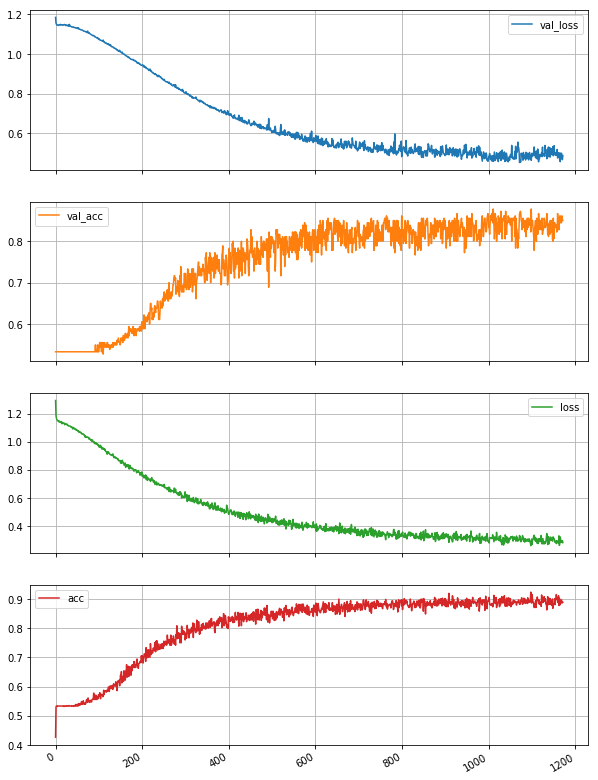

In [34]:
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

# <font color = blue>Testing Accuracy [Software 2.0]</font>

In [35]:
def decodeLabel(encodedLabel):
    if encodedLabel == 0:
        return "Other"
    elif encodedLabel == 1:
        return "Fizz"
    elif encodedLabel == 2:
        return "Buzz"
    elif encodedLabel == 3:
        return "FizzBuzz"

In [36]:
wrong   = 0
right   = 0

testData = pd.read_csv('testing.csv')

processedTestData  = encodeData(testData['input'].values)
processedTestLabel = encodeLabel(testData['label'].values)
predictedTestLabel = []

for i,j in zip(processedTestData,processedTestLabel):
    y = model.predict(np.array(i).reshape(-1,10))
    predictedTestLabel.append(decodeLabel(y.argmax()))
    
    if j.argmax() == y.argmax():
        right = right + 1
    else:
        wrong = wrong + 1

print("Errors: " + str(wrong), " Correct :" + str(right))

print("Testing Accuracy: " + str(right/(right+wrong)*100))

# Please input your UBID and personNumber 
testDataInput = testData['input'].tolist()
testDataLabel = testData['label'].tolist()

testDataInput.insert(0, "UBID")
testDataLabel.insert(0, "XXXXXXXX")

testDataInput.insert(1, "personNumber")
testDataLabel.insert(1, "XXXXXXXX")

predictedTestLabel.insert(0, "")
predictedTestLabel.insert(1, "")

output = {}
output["input"] = testDataInput
output["label"] = testDataLabel

output["predicted_label"] = predictedTestLabel

opdf = pd.DataFrame(output)
opdf.to_csv('output.csv')

Errors: 13  Correct :87
Testing Accuracy: 87.0
